<div>
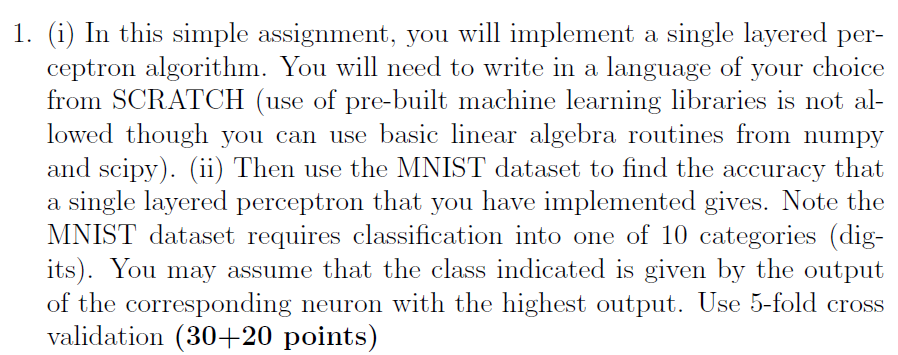
</div>

In [2]:
# all the inbuilt stuff that's required
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
import numpy as np


In [3]:
# defining a function for a single layered perceptron
def Single_layered_perceptron(X_train, y_train, X_test,y_test):
    l_rate = 0.01 #learning rate
    n_iterations  = 1000
    n_samples,n_features = X_train.shape
    weights = []
    for i in range(n_features):
        weights.append(0.25)
        
# converting to one-hot encoding 
    one_hot_y_train = []
    for i in y_train:
        sample = [0,0,0,0,0,0,0,0,0,0]
        sample[i] = 1
        one_hot_y_train.append(sample)
        
    one_hot_y_test = []
    for i in y_test:
        sample = [0,0,0,0,0,0,0,0,0,0]
        sample[i] = 1
        one_hot_y_test.append(sample)

# making our model "learn" for our training set
# this is batch learning 
    for i in range(n_iterations):
        for j,val in enumerate(X_train):
            w_sum =  np.dot(val,weights)
            y_pred = 1/(1+np.exp(-(l_rate*w_sum)))
        
            update = l_rate*(y_train[j] - y_pred)
            weights += update*val
            
# predicting for our test set
    w_sum_test = np.dot(X_test,weights)
    y_pred_test = 1/(1+np.exp(-(l_rate*w_sum_test)))
    return (y_pred_test)                

In [4]:
# loading the MNIST datasets
X, y = load_digits(return_X_y=True, as_frame = False)
print(X)
print(y)
print(X.shape)
print(y.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
(1797, 64)
(1797,)


In [5]:
# splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42,
                                                    stratify = y)

In [6]:
y_predicted = Single_layered_perceptron(X_train, y_train, X_test,y_test)
print (y_predicted)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [7]:
# calculating accuracy

acc = accuracy_score(y_predicted,y_test)
print(acc)

0.1


<div>
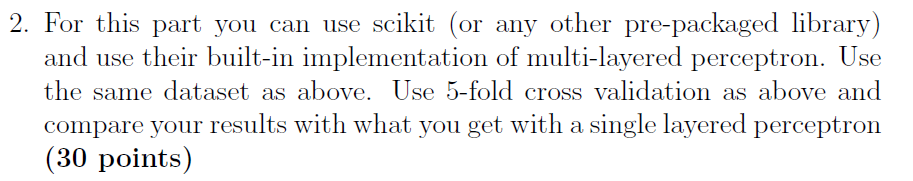
</div>

In [8]:
# all the inbuilt stuff that's required
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_digits
import numpy as np

In [9]:
# loading the MNIST datasets
X, y = load_digits(return_X_y=True, as_frame = False)
print(X)
print(y)
print(X.shape)
print(y.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
(1797, 64)
(1797,)


In [10]:
# creating a MLP classifier
clf = MLPClassifier(solver = "sgd", alpha = 1e-5, random_state=42, max_iter=2500,
                          hidden_layer_sizes = (15,15,15))
# three layers

In [11]:
# we are using stratified k fold cross validation. Here k is 5.
skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)

In [12]:
# fitting the model
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=skf, n_jobs=-1)
print(scores)

[0.94444444 0.93888889 0.96657382 0.95821727 0.93871866]


In [13]:
# mean of accuracy
print('Accuracy: ',np.mean(scores))

Accuracy:  0.9493686165273909


For an MLP that uses stratified 5 fold cross validation I was able to get an accuracy of 94.76%.